# 2장 파이썬 사용 기초

In [1]:
import pandas as pd
import numpy as np

### 데이터 백터 저장하기

In [2]:
score1 = np.array([96, 80, 76, 96, 88, 75, 78])
score2 = np.array([67, 83, 76, 96, 88, 75, 78])

In [3]:
score = np.append(score1, score2)
print(score)

[96 80 76 96 88 75 78 67 83 76 96 88 75 78]


- 데이터 수평결합

In [4]:
sc = np.hstack([score1, score2])
print(sc)

[96 80 76 96 88 75 78 67 83 76 96 88 75 78]


* 숫자의 올림, 내림, 버림, 반올림

In [5]:
import math
z = math.ceil(2.54864) #올림
print(z)
z = math.floor(2.54864) #내림
print(z)
z = math.trunc(2.54864) #버림
print(z)
z = round(2.54864, 2) # 소수점 이하 2 자리 반올림
print(z)

3
2
2
2.55


### 기초 통계량 구하기

In [6]:
import scipy as sp
import numpy as np

In [7]:
score1 = np.array([96, 80, 76, 96, 88, 75, 78])

In [8]:
np.amin(score1) # 최소값

75

In [9]:
np.amax(score1) # 최대값

96

In [10]:
score1/np.std(score1, ddof=1) #표준화

array([10.50727073,  8.75605894,  8.31825599, 10.50727073,  9.63166483,
        8.20880526,  8.53715747])

In [11]:
score1/np.std(score1, ddof=0) #표준화(unbiased var)

array([11.34914951,  9.45762459,  8.98474336, 11.34914951, 10.40338705,
        8.86652305,  9.22118397])

In [12]:
from scipy import stats
stats.scoreatpercentile(score1, 25) # 25 percentile

77.0

### 행, 열별 함수 적용하기

* 데이터프레임 생성

In [13]:
df = pd.DataFrame({
    'Alphabet' : ['a','b','c','d','e','f','g','h','i','j'],
    'num' : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    'length' : np.arange(10)
})
df # python의 dict와 비슷

,Alphabet,num,length
0,a,3,0
1,b,3,1
2,c,3,2
3,d,3,3
4,e,3,4
5,f,3,5
6,g,3,6
7,h,3,7
8,i,3,8
9,j,3,9


In [14]:
df.mean() #열 별 평균, 계산할 수 없는 열은 자동으로 넘어감

num       3.0
length    4.5
dtype: float64

In [15]:
df.mean(axis=0) # column 별 평균

num       3.0
length    4.5
dtype: float64

In [16]:
df.mean(axis=1) # row 별 평균

0    1.5
1    2.0
2    2.5
3    3.0
4    3.5
5    4.0
6    4.5
7    5.0
8    5.5
9    6.0
dtype: float64

* 순서함수

In [17]:
a = [3,2,1,4,5]

In [18]:
sorted(a)

[1, 2, 3, 4, 5]

In [19]:
np.sort(a) #array로 반환

array([1, 2, 3, 4, 5])

In [20]:
sorted(a, reverse=True)

[5, 4, 3, 2, 1]

In [21]:
a.sort() # 정렬된 값이 a에 적용됨
a

[1, 2, 3, 4, 5]

* 순서함수의 활용

In [22]:
df = pd.DataFrame({
    'name' : ['KIM', 'LEE', 'PARK', 'BAE'],
    'age' : [24, 32, 24, np.nan],
    'height' : [160, 170, 180, 155]
})
df

,name,age,height
0,KIM,24.0,160
1,LEE,32.0,170
2,PARK,24.0,180
3,BAE,NaN,155


In [23]:
df['age_rank'] = df['age'].rank(method = 'min', ascending=False, na_option='bottom')
df

,name,age,height,age_rank
0,KIM,24.0,160,2.0
1,LEE,32.0,170,1.0
2,PARK,24.0,180,2.0
3,BAE,NaN,155,4.0


In [24]:
# ascending=False  :  내림차순 정렬
# method = 'min'   :   동점일 경우 최솟값 할당
# na_option='bottom'   : 결측값은 후순위 할당

* 결측치를 선순위를 주고자 할 경우

In [25]:
df['age_rank'] = df['age'].rank(method = 'min', ascending=False, na_option='top')
df

,name,age,height,age_rank
0,KIM,24.0,160,3.0
1,LEE,32.0,170,2.0
2,PARK,24.0,180,3.0
3,BAE,NaN,155,1.0


* DataFrame 안에서 'name'을 기준으로 순서함수 적용하기

In [26]:
df_sort_name = df.sort_values(by='name')  # 오름차순 배열
df_sort_name

,name,age,height,age_rank
3,BAE,NaN,155,1.0
0,KIM,24.0,160,3.0
1,LEE,32.0,170,2.0
2,PARK,24.0,180,3.0


In [27]:
df_sort_name = df.sort_values(by='name', ascending=False)  # 내림차순 배열
df_sort_name

,name,age,height,age_rank
2,PARK,24.0,180,3.0
1,LEE,32.0,170,2.0
0,KIM,24.0,160,3.0
3,BAE,NaN,155,1.0


### 구조적 데이터 만들기

* arange, tile, zeors, ones함수

In [30]:
np.arange(1,7,2)  #1부터 7-1까지 2칸씩 띄우면서 출력

array([1, 3, 5])

In [31]:
np.tile(0,5)

array([0, 0, 0, 0, 0])

In [32]:
np.tile('a',3)

array(['a', 'a', 'a'], dtype='<U1')

In [33]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
np.zeros(6)

array([0., 0., 0., 0., 0., 0.])

In [35]:
np.ones(4)

array([1., 1., 1., 1.])

In [36]:
np.ones([2,5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

### 데이터 백터 다루기

*인덱스(index)

In [37]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

In [38]:
x[1]

2

In [39]:
x[1:3]

array([2, 3])

In [40]:
x[1:9:2]

array([2, 4, 6, 8])

In [41]:
x[-1]

10

In [42]:
x[6:]

array([ 7,  8,  9, 10])

In [43]:
x[:4]

array([1, 2, 3, 4])

In [45]:
sample_array = np.array([1,2,3,4,5])

In [46]:
df = pd.DataFrame({
    'col1' : sample_array,
    'col2' : sample_array *2,
    'col3' : ['A', 'B', 'C', 'D', 'E']
})
df

,col1,col2,col3
0,1,2,A
1,2,4,B
2,3,6,C
3,4,8,D
4,5,10,E


### 백터와 행렬 표현과 연산

In [47]:
A = np.array(
    [[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]])
A

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

열 벡터 a = a1  \
　　　　　a2  \
　　　　　a3

행 벡터 a' = (a1, a2, a3)

### 전치행렬

In [50]:
B =np.array(
    [[1,2], [3,4], [5,6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

* B의 전치행렬

In [52]:
B.T

array([[1, 3, 5],
       [2, 4, 6]])

### 행렬의 계산

In [53]:
x = np.array([1,2,3,4,5])
y = np.array([-1,-2,-3,-4,-5])
x+y

array([0, 0, 0, 0, 0])

x'y

In [56]:
np.matmul(x.transpose(), y)

-55

In [57]:
np.matmul(x.T, y)

-55

In [58]:
x.T@y

-55

In [59]:
x@x.T

55

* 외적 outer

In [60]:
np.outer(x, x.T)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

그냥 x를 쓰게 되면

In [62]:
x*x  #각 성분의 곱으로 계산

array([ 1,  4,  9, 16, 25])

#### x, y를 하나의 열벡터로 만들기

In [63]:
np.r_[x,y]

array([ 1,  2,  3,  4,  5, -1, -2, -3, -4, -5])

In [64]:
np.hstack([x,y])

array([ 1,  2,  3,  4,  5, -1, -2, -3, -4, -5])

In [65]:
np.concatenate((x,y),axis=0)

array([ 1,  2,  3,  4,  5, -1, -2, -3, -4, -5])

#### x,y를 두 개의 열벡터를 가진 행렬로 만들기

In [68]:
np.c_[x,y]

array([[ 1, -1],
       [ 2, -2],
       [ 3, -3],
       [ 4, -4],
       [ 5, -5]])

In [67]:
np.column_stack([x,y])

array([[ 1, -1],
       [ 2, -2],
       [ 3, -3],
       [ 4, -4],
       [ 5, -5]])

#### x,y를 두 개의 행벡터를 가진 행렬로 만들기

In [71]:
np.r_[[x],[y]]

array([[ 1,  2,  3,  4,  5],
       [-1, -2, -3, -4, -5]])

In [72]:
np.vstack([x,y])

array([[ 1,  2,  3,  4,  5],
       [-1, -2, -3, -4, -5]])

* 내적 dot

In [73]:
np.dot(x,y)

-55

#### 차원 알아보기

In [75]:
x.shape

(5,)

In [76]:
B = np.r_[[x],[y]]
B.shape

(2, 5)

### 대각행렬
#### 대각선에만 특정 값이 있는 행렬

In [83]:
np.diag([1 for _ in range(5)])  # I, 단위 행렬이라고 부름

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [82]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

* 역행렬 = 자신과 곱했을 때, 단위행렬이 나오게 하는 행렬

AA^-1 = I

In [90]:
#a의 역행렬
a = np.array([[1,2,3],[1,3,3],[1,2,4]])
a_inv = np.linalg.inv(a)
a_inv

array([[ 6., -2., -3.],
       [-1.,  1.,  0.],
       [-1.,  0.,  1.]])

In [91]:
a@a_inv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

* 2X3 2차원 배열 만들기

In [92]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [93]:
np.empty((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

* 값이 모두 3인 2X4배열 만들기

In [94]:
np.full((2,4),3)

array([[3, 3, 3, 3],
       [3, 3, 3, 3]])

* 3차원 4X3X2 배열에 0부터 23까지 값 할당하기

In [97]:
b = np.arange(24).reshape(4,3,2) # arange로 0~23 list를 만든 뒤, reshape로 배열생성
b

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

* 3차원 배열에서의 성분 선택

In [98]:
b[0,:,:]

array([[0, 1],
       [2, 3],
       [4, 5]])

In [99]:
b[1,1,:]

array([8, 9])

In [101]:
b[3,1,1]

21

* 3X3행렬에서 대각선에는 1, 아닌 곳에는 0을 갖는 단위행렬 만들기

In [107]:
np.diag([1 for _ in range(3)])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [108]:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 결측값

In [121]:
b = np.arange(12).reshape(4,3)
df = pd.DataFrame(b, columns=['X1','X2','X3'])
df

,X1,X2,X3
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


* 결측값 만들기

In [122]:
df.loc[1,['X1','X3']] = np.nan
df

,X1,X2,X3
0,0.0,1,2.0
1,NaN,4,NaN
2,6.0,7,8.0
3,9.0,10,11.0


* 결측값 대체하기

In [124]:
df_0 = df.fillna(0)
df_0

,X1,X2,X3
0,0.0,1,2.0
1,0.0,4,0.0
2,6.0,7,8.0
3,9.0,10,11.0


In [126]:
df_missing = df.fillna('missing')
df_missing

,X1,X2,X3
0,0.0,1,2.0
1,missing,4,missing
2,6.0,7,8.0
3,9.0,10,11.0


* 결측값을 앞 열의 값으로 대체하기

In [128]:
df.fillna(method='ffill')

,X1,X2,X3
0,0.0,1,2.0
1,0.0,4,2.0
2,6.0,7,8.0
3,9.0,10,11.0


* 결측값을 뒤 열의 값으로 대체하기

In [129]:
df.fillna(method='bfill')

,X1,X2,X3
0,0.0,1,2.0
1,6.0,4,8.0
2,6.0,7,8.0
3,9.0,10,11.0


* 결측값을 변수별 평균으로 대체

In [130]:
df.fillna(df.mean())

,X1,X2,X3
0,0.0,1,2.0
1,5.0,4,7.0
2,6.0,7,8.0
3,9.0,10,11.0


### 데이터프레임에서 특정 열 추출

In [133]:
df

,X1,X2,X3
0,0.0,1,2.0
1,NaN,4,NaN
2,6.0,7,8.0
3,9.0,10,11.0


In [132]:
df.X1

0    0.0
1    NaN
2    6.0
3    9.0
Name: X1, dtype: float64

In [134]:
df['X1']

0    0.0
1    NaN
2    6.0
3    9.0
Name: X1, dtype: float64

In [135]:
df[['X1','X2']]

,X1,X2
0,0.0,1
1,NaN,4
2,6.0,7
3,9.0,10


In [137]:
df.drop('X2', axis=1)

,X1,X3
0,0.0,2.0
1,NaN,NaN
2,6.0,8.0
3,9.0,11.0


In [138]:
df.query('index==0')

,X1,X2,X3
0,0.0,1,2.0


In [139]:
df.query('X1==0')

,X1,X2,X3
0,0.0,1,2.0


In [141]:
df.query('X1==0 | X3==8') # X1열의 값이 0 또는 X3열의 값이 8인 경우만 출력

,X1,X2,X3
0,0.0,1,2.0
2,6.0,7,8.0


In [143]:
df.query('X1==0 | X1==9')[['X2','X3']]

,X2,X3
0,1,2.0
3,10,11.0


### 데이터 파일 읽기, 파일로 저장하기

* 파일읽기 txt나 csv파일

In [147]:
test = pd.read_csv('data/toeic.csv')
test.head(1)

,Gender,LC,RC
0,female,315,320


In [148]:
df

,X1,X2,X3
0,0.0,1,2.0
1,NaN,4,NaN
2,6.0,7,8.0
3,9.0,10,11.0


In [149]:
df.to_csv('c://데이터파일//dfex1.csv', header=True, index=True)

In [152]:
AA = pd.read_csv('c://데이터파일//dfex1.csv') #txt로 저장하려면 .txt로

In [153]:
AA

,Unnamed: 0,X1,X2,X3
0,0,0.0,1,2.0
1,1,NaN,4,NaN
2,2,6.0,7,8.0
3,3,9.0,10,11.0


### 데이터셋 합치기

In [160]:
author = pd.DataFrame({
    'surname' : ['Tukey', 'Venables', 'Tim', 'Rey'],
    'nationality' : ['US', 'Australia', 'US', 'UK']
})
author

,surname,nationality
0,Tukey,US
1,Venables,Australia
2,Tim,US
3,Rey,UK


In [161]:
books = pd.DataFrame({
    'name' : ['Tukey', 'Venables', 'Tim', 'Rey'],
    'year' : [1976, 2000, 2010, 2021]
})
books

,name,year
0,Tukey,1976
1,Venables,2000
2,Tim,2010
3,Rey,2021


In [162]:
#author의 surname과 books의 name이 동일한 경우 병합
mer = pd.merge(author, books, left_on=['surname'], right_on=['name'])
mer

,surname,nationality,name,year
0,Tukey,US,Tukey,1976
1,Venables,Australia,Venables,2000
2,Tim,US,Tim,2010
3,Rey,UK,Rey,2021


In [163]:
mer.drop(['surname'], axis=1, inplace=True) #inplace=True : mer에 바로 반영하겠다
mer

,nationality,name,year
0,US,Tukey,1976
1,Australia,Venables,2000
2,US,Tim,2010
3,UK,Rey,2021


In [165]:
author1 = pd.DataFrame({
    'surname' : ['Tukey', 'Venables', 'Tim', 'Rey'],
    'nationality' : ['US', 'Australia', 'US', 'UK']
})
author1

,surname,nationality
0,Tukey,US
1,Venables,Australia
2,Tim,US
3,Rey,UK


In [166]:
books1 = pd.DataFrame({
    'name' : ['Tukey', 'Venables', 'Tim', 'Rey', 'KIM'],
    'year' : [1976, 2000, 2010, 2021, 2022]
})
books1

,name,year
0,Tukey,1976
1,Venables,2000
2,Tim,2010
3,Rey,2021
4,KIM,2022


In [169]:
mer1 = pd.merge(author1, books1, left_on=['surname'], right_on=['name'])
mer1

,surname,nationality,name,year
0,Tukey,US,Tukey,1976
1,Venables,Australia,Venables,2000
2,Tim,US,Tim,2010
3,Rey,UK,Rey,2021


In [170]:
mer2 = pd.merge(author1, books1, left_on=['surname'], right_on=['name'], how='outer')
mer2

,surname,nationality,name,year
0,Tukey,US,Tukey,1976
1,Venables,Australia,Venables,2000
2,Tim,US,Tim,2010
3,Rey,UK,Rey,2021
4,NaN,NaN,KIM,2022


# 연습문제

* 2번) 2 3 5 7 9 10  \
1) 벡터x를 만드시오.  \
2) 각 데이터의 제곱으로 구성된 벡터 x2를 만드시오.  \
3) 각 데이터의 제곱의 합을 구하시오.  \
4) 최댓값, 최소값을 구하시오.  \
5) 5보다 큰 값들만으로 구성된 x_up을 만드시오.  \
6) xx'를 구하시오.  \
7) x'x를 구하시오.  \
8) x와 x2를 열결합하여 xc에 할당하시오.  \
9) x와 x2를 행결합하여 xr에 할당하시오.

In [175]:
# 1)
x = np.array([2,3,5,7,9,10])
print(x)
# 2)
x2 = x**2
print(x2)
# 3)
print(x2.sum())
# 4)
print(x.max())
print(x.min())
# 5)
x_up = x[x>5]
print(x_up)
# 6)
print(np.outer(x, x.T))
# 7)
print(x.T@x)
# 8)
xc = np.c_[x, x2]
print(xc)
# 9)
xr = np.r_[[x], [x2]]
print(xr)

[ 2  3  5  7  9 10]
[  4   9  25  49  81 100]
268
10
2
[ 7  9 10]
[[  4   6  10  14  18  20]
 [  6   9  15  21  27  30]
 [ 10  15  25  35  45  50]
 [ 14  21  35  49  63  70]
 [ 18  27  45  63  81  90]
 [ 20  30  50  70  90 100]]
268
[[  2   4]
 [  3   9]
 [  5  25]
 [  7  49]
 [  9  81]
 [ 10 100]]
[[  2   3   5   7   9  10]
 [  4   9  25  49  81 100]]


* 4번 다음 값이 나오도록 함수를 사용하여 명령문을 만들고 결과를 보이시오. \
1) 'a','a','a','a','a','a','a','a'  \
2) 1,1,1,2,2,2,3,3,3,4,4,4,5,5,5  \
3) 1부터 100 사이의 홀수  \
4) 1,5,19,30을 갖는 array  \
5) -10부터 10까지의 정수

In [187]:
#1
a = np.full(8, 'a')
print(a)

#2
b = np.arange(1, 6)
c = sorted(np.r_[b, b, b])
print(c)

#3
print(np.arange(1,101,2))

#4
print(np.array([1,5,19,30]))

#5
print(np.arange(-10, 11))

['a' 'a' 'a' 'a' 'a' 'a' 'a' 'a']
[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95
 97 99]
[ 1  5 19 30]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


* 5번 1~10까지 갖는 벡터 x \
sigma(xi/i), i=1 ~ 10 구하시오.

In [190]:
x = np.arange(1, 11)
sig = 0
for i in range(0, 10):
    sig += x[i]/(i+1)
print(sig)

10.0


* 7번  \
-4.123 -3.556 1.634 2.213 3.875  \
1)벡터 x에 할당 후 출력  \
2)x가 소수점 둘째 자리까지만 갖도록 y에 저장 후 출력  \
3)x와 y의 차를 구하시오  \
4)x의 소수 첫째 자리까지 반올림한 값이 나오도록 하시오.  \
5)x의 올림한 값을 구하시오  \
6)x의 내림한 값을 구하시오

In [195]:
#1
x = np.array([4.123, -3.556, 1.634, 2.213, 3.875])
print(x)

#2
import math
y = np.around(x, 2)

#3
print(x-y)

#4
print(np.around(x, 1))

#5
print(np.ceil(x))

#6
print(np.floor(x))

[ 4.123 -3.556  1.634  2.213  3.875]
[ 0.003  0.004  0.004  0.003 -0.005]
[ 4.1 -3.6  1.6  2.2  3.9]
[ 5. -3.  2.  3.  4.]
[ 4. -4.  1.  2.  3.]


* 9번

In [191]:
korean1 = pd.DataFrame({
    '국어' : [93,84,87,95,98,77,82,92],
    '1반' : ['kim', 'lee', 'park','oh','yang','min','jung','moon']})
korean2 = pd.DataFrame({
    '국어' : [90,95,88,75,79,87,90,90],
    '2반' :['kim', 'lee', 'park','oh','yang','min','jung','moon']})
a = pd.concat([korean1,korean2], axis=0)
B = pd.melt(a, id_vars='국어', var_name='반', value_name='성')
B.dropna(inplace=True)
B = B.reset_index(drop=True)
B

,국어,반,성
0,93,1반,kim
1,84,1반,lee
2,87,1반,park
3,95,1반,oh
4,98,1반,yang
5,77,1반,min
6,82,1반,jung
7,92,1반,moon
8,90,2반,kim
9,95,2반,lee


# 3장 그래프

In [196]:
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline

#matplotlib은 그래프를 그리는 표준라이브러리
#seaborn은 그래프를 더 예쁘게 그릴 수 있게 하는 라이브러리

* 기본 그래프 그리기

Text(0, 0.5, 'Y')

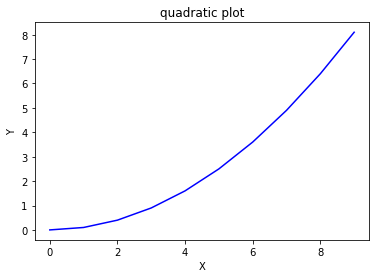

In [197]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = (x**2)/10

plt.plot(x, y, 'b')
plt.title('quadratic plot')
plt.xlabel('X')
plt.ylabel('Y')

* seaborn으로 그래프 디자인하기

Text(0, 0.5, 'Y')

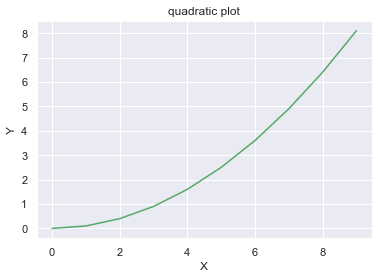

In [198]:
sns.set()
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = (x**2)/10

plt.plot(x, y, 'g')
plt.title('quadratic plot')
plt.xlabel('X') ; plt.ylabel('Y')

* 표준정규분포를 따르는 랜덤 데이터 100개를 히스토그램으로 그리기

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

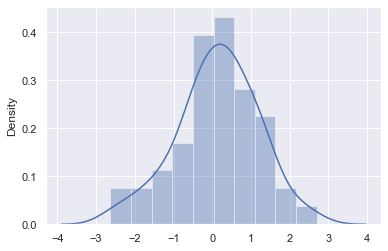

In [200]:
x = np.random.normal(size = 100)
sns.distplot(x)

(array([ 4.,  4.,  6.,  9., 21., 23., 15., 12.,  4.,  2.]),
 array([-2.633, -2.1  , -1.567, -1.033, -0.5  ,  0.033,  0.566,  1.1  ,
         1.633,  2.166,  2.699]),
 <BarContainer object of 10 artists>)

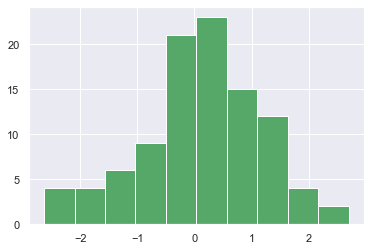

In [203]:
plt.hist(x, bins=10, color='g')

(array([0.075, 0.075, 0.113, 0.169, 0.394, 0.431, 0.281, 0.225, 0.075,
        0.038]),
 array([-2.633, -2.1  , -1.567, -1.033, -0.5  ,  0.033,  0.566,  1.1  ,
         1.633,  2.166,  2.699]),
 <BarContainer object of 10 artists>)

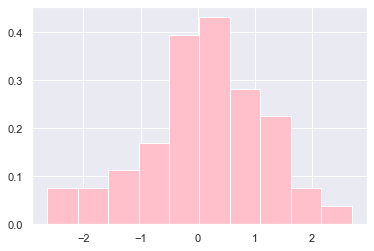

In [208]:
plt.hist(x, density=True, color='pink') #density = True : y축의 값을 density로 변경

* 표준정규분포를 따르는 랜덤 데이터 100개를 상자그림으로 그리기

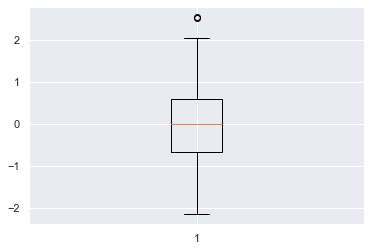

In [213]:
x = np.random.normal(size=100)
plt.boxplot(x)
plt.show()

In [214]:
fish=pd.read_csv('data/3-3-2-fish_multi_2.csv')
fish

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [216]:
fish.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

<AxesSubplot:xlabel='species', ylabel='length'>

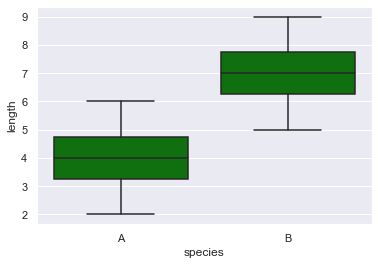

In [220]:
sns.boxplot(x='species', y='length', data=fish, color='green')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'denisity')

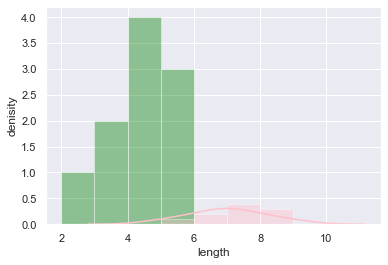

In [224]:
a = fish.query("species=='A'")['length']
b = fish.query("species=='B'")['length']
sns.distplot(a, bins=4, color='green',kde=False)
sns.distplot(b, bins=4, color='pink',kde=True) # kde를 True로 줬기 때문에 density로 변경됨
plt.ylabel('denisity')

* (x,y) 산점도

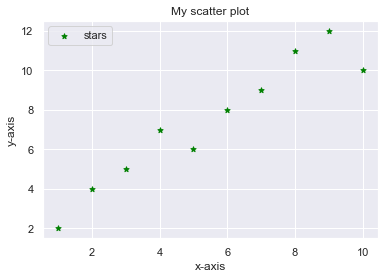

In [226]:
x = list(range(1,11))
y = [2,4,5,7,6,8,9,11,12,10]

plt.scatter(x, y, label='stars', color='green', marker ='*', s=30)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('My scatter plot')
plt.legend()
plt.show()

* 두 선을 같은 좌표평면에 그리기

No handles with labels found to put in legend.


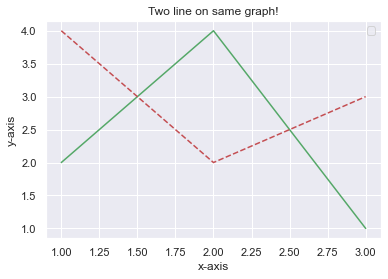

In [245]:
x1 = [1,2,3]
y1 = [2,4,1]
plt.plot(x1,y1,label='line 1')

x2=[1,2,3]
y2=[4,2,3]
plt.plot(x2,y2,label='line 2')

# plt.plot(x1,y1,'g-', x2,y2,'r--')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Two line on same graph!')
plt.legend()
plt.show()

* 하나는 점으로 하나는 선으로 그리기

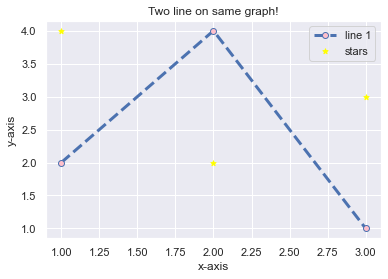

In [230]:
plt.plot(x1,y1,label='line 1', linestyle='dashed', linewidth=3, marker='o',markerfacecolor='pink',markersize=6)
plt.scatter(x2,y2,label='stars',color='yellow', marker='*', s=30)


plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Two line on same graph!')
plt.legend()
plt.show()

* 파이 그래프 그리기

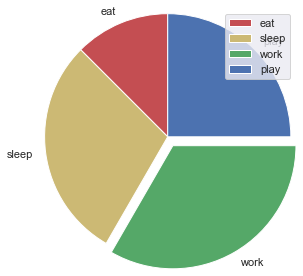

In [240]:
activities = ['eat', 'sleep', 'work', 'play']
slices = [3,7,8,6]
colors = ['r','y','g','b']

plt.pie(slices, labels=activities, colors=colors, startangle=90, explode=(0,0,0.1,0), radius=1.2) #explode는 띄우기, radius=원지름
plt.legend()
plt.tight_layout()
plt.show()

* dufj rmfovmfmf gks ghkausdp qoduf

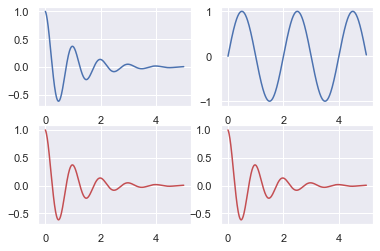

In [246]:
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)
def g(t):
    return np.sin(np.pi*t)

t1 = np.arange(0.0, 5.0, 0.01)
t2 = np.arange(0.0, 5.0, 0.01)

plt.subplot(221)
plt.plot(t1, f(t1))
plt.subplot(222)
plt.plot(t2, g(t2))
plt.subplot(223)
plt.plot(t1, f(t1), 'r-')
plt.subplot(224)
plt.plot(t2, f(t2), 'r-')


|name|color|marker|meaning
|:--|:--|:--|:--|
|b|blue|o|circle
|g|green|^|triangle
|r|red|s|square
|c|cyan(청록)|+|plus
|m|magenta(자홍)|.|point
|y|yellow|star|
|k|black|
|w|white|

### plt.xlim() : x축의 상, 하한선 주기, ex) plt.xlim = c(1,10)
### plt.ylim() : y축의 상, 하한선 주기

### 점 크기가 위치에 따라 달라지는 그래프 그리기

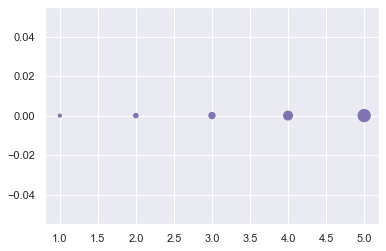

In [261]:
x = [1,2,3,4,5]
y = [0,0,0,0,0]
s = [10,20,40,80,150]
plt.scatter(x,y,s,color='m')

In [263]:
primates = pd.DataFrame({
    'animal' : ['monkey', 'gorilla', 'human', 'Rhesus monkey', 'chimp'],
    'bodywt' : [10, 207, 62, 6.8, 52.2],
    'brainwt' : [115, 406, 1320, 179, 440]
})
primates

,animal,bodywt,brainwt
0,monkey,10.0,115
1,gorilla,207.0,406
2,human,62.0,1320
3,Rhesus monkey,6.8,179
4,chimp,52.2,440


## 그래프에 다양한 옵션 적용하기

Text(10, 160, 'Rhesus monkey')

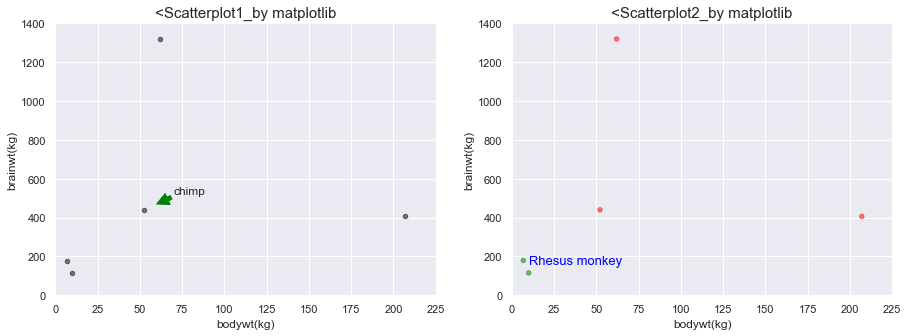

In [281]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter('bodywt', 'brainwt', data=primates, marker='o', s=20, color='black',alpha=0.5)
plt.title('<Scatterplot1_by matplotlib', fontsize=15)
plt.xlabel('bodywt(kg)', fontsize=12)
plt.ylabel('brainwt(kg)', fontsize=12)
plt.xlim(0,225), plt.ylim(0,1400)
plt.annotate('chimp', xy=(60,470), xytext=(70,520),arrowprops={'color':'green'})



plt.subplot(122)
cutpoint=(primates['bodywt']>50) & (primates['brainwt']>300)
primates['color'] = np.where(cutpoint==True, 'red', 'green')

plt.scatter('bodywt', 'brainwt', data=primates, marker='o', color=primates['color'], s=20, alpha=0.5)
plt.title('<Scatterplot2_by matplotlib', fontsize=15)
plt.xlabel('bodywt(kg)', fontsize=12)
plt.ylabel('brainwt(kg)', fontsize=12)
plt.xlim(0,225), plt.ylim(0,1400)
plt.text(10,160,'Rhesus monkey', fontsize=13, color='blue')

## 분포 그래프 pairplot 그리기

In [283]:
iris = sns.load_dataset('iris')
print(iris.groupby('species').mean())

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


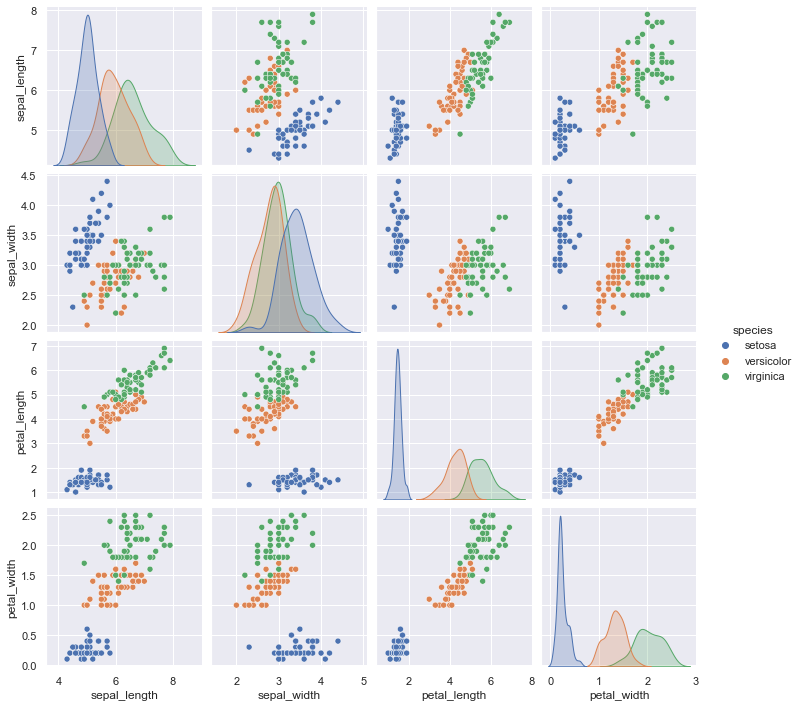

In [284]:
sns.pairplot(iris, hue='species')

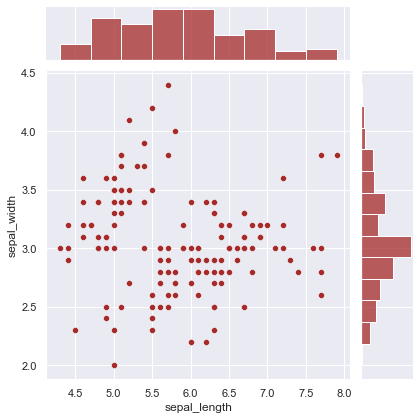

In [285]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, color='brown')

In [290]:
A = iris.groupby('species').mean()
A

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<AxesSubplot:xlabel='species'>

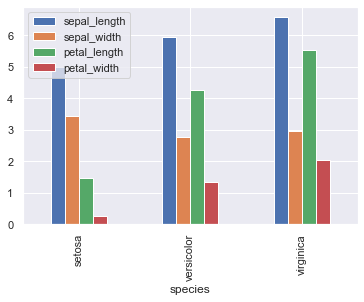

In [292]:
A.plot.bar()

* 붓꽃 데이터셋의 변수별 분포 그리기

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
#연속형 변수 추출
iris_numeric = iris.drop('species', axis=1)
print(iris_numeric)
for i in iris_numeric:
    print(i)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
sepal_length
sepal_width
petal_length
petal_width


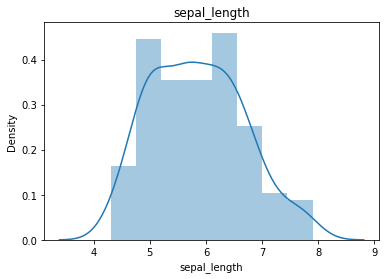

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


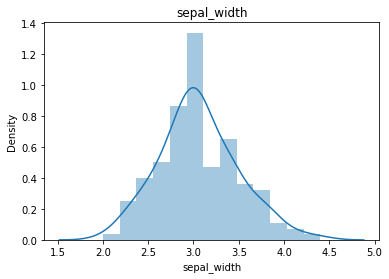

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


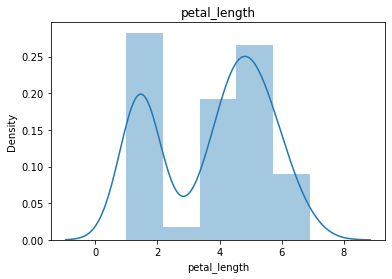

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


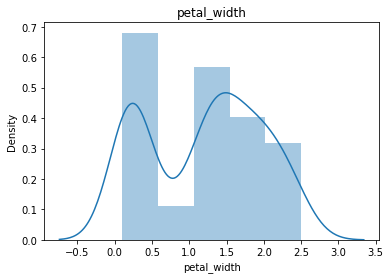

In [26]:
for i in iris_numeric:
    sns.distplot(iris.loc[iris[i].notnull(), i])
    plt.title(i)
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

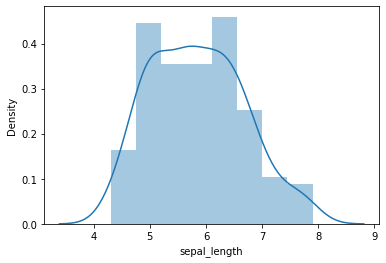

In [42]:
sns.distplot(iris.loc[iris['sepal_length'].notnull(), 'sepal_length'])

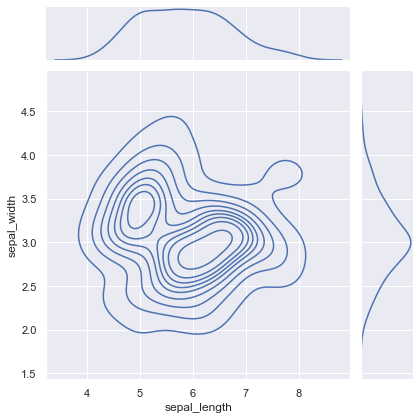

In [49]:
sns.set()
sns.jointplot(x='sepal_length', y = 'sepal_width', data=iris, kind='kde')
plt.show()

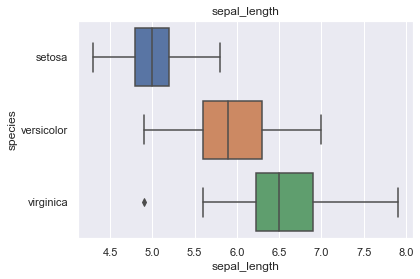

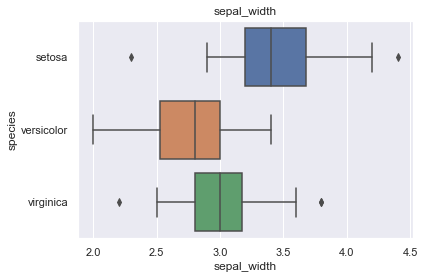

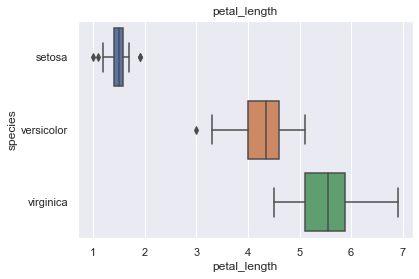

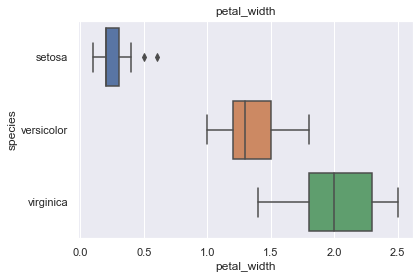

In [50]:
for i in iris_numeric:
    sns.boxplot(x = iris.loc[iris[i].notnull(), i], y = 'species', data = iris)
    plt.title(i)
    plt.show()

### 각 변수에 관한 분포 그래프 그리기(여러 그래프, PairGrid)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

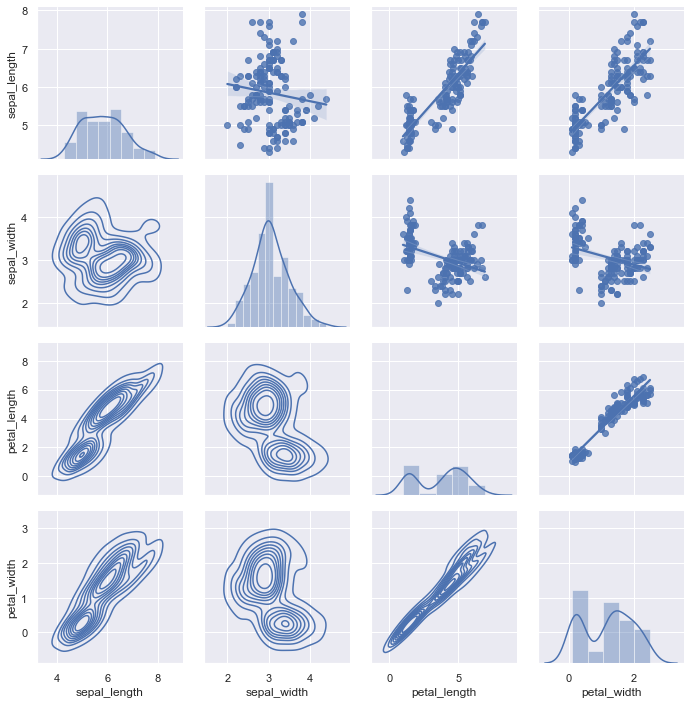

In [53]:
pg = sns.PairGrid(iris)   # pairgrid 형태 만들기
pg.map_upper(sns.regplot) # 위쪽은 산점도를 위치
pg.map_lower(sns.kdeplot) # 아래쪽은 커널밀도함수 위치
pg.map_diag(sns.distplot)  # 가운데는 히스토그램 위치

### 모자이크 그림

In [56]:
from statsmodels.graphics.mosaicplot import mosaic

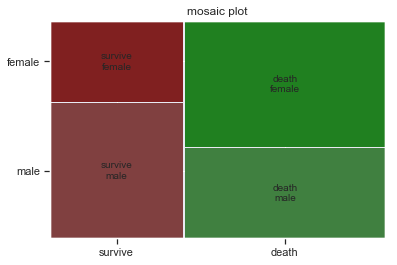

In [59]:
airplan ={('survive', 'male') : 50, ('survive', 'female') : 30,
         ('death', 'male') : 50, ('death', 'female') : 70}
mosaic(airplan, title='mosaic plot')
plt.show()

### 표준정규분포의 확률밀도함수 그리기

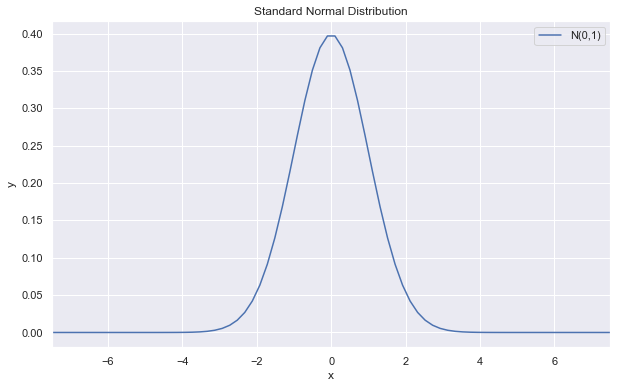

In [62]:
x = np.linspace(-10,10,100) #-10에서 10 사이를 100칸으로 나누기
y = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.figure(figsize=(10,6))
plt.plot(x,y) ; plt.xlabel('x');plt.ylabel('y')
plt.legend(['N(0,1)'])
# plt.grid()
plt.title('Standard Normal Distribution')
plt.xlim(-7.5,7.5)
plt.show()

### 3장 연습문제

* y=x^2, x|-1,1| 그래프를 그리시오  \
* 1) [-1, 1] 사이에 등간격 100개 값을 생성하여 x 에 할당  \
* 2) 점으로 표시되도록 그리기  \
* 3) 좌표평면에 빨간색 선으로 출력되도록 그리기  \

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

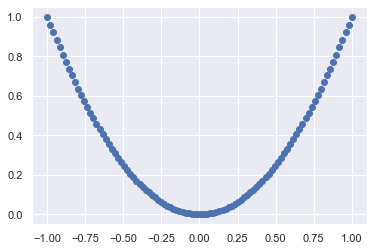

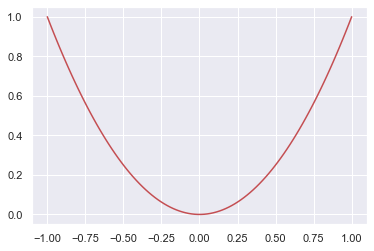

In [66]:
#1
x = np.linspace(-1,1,100)
y = x**2
print(x)
#2
plt.scatter(x, y)
plt.show()
#3
plt.plot(x, y, 'r')

* 2번

<ipython-input-71-74ec7e3b47fd>:8: RuntimeWarning: divide by zero encountered in log
  plt.scatter(x, np.log(x), s=5)


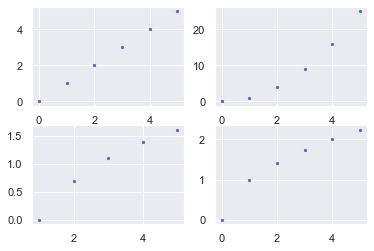

In [71]:
#1
x = np.arange(0,6)
plt.subplot(221)
plt.scatter(x, x, s=5)
plt.subplot(222)
plt.scatter(x, x**2, s=5)
plt.subplot(223)
plt.scatter(x, np.log(x), s=5)
plt.subplot(224)
plt.scatter(x, np.sqrt(x), s=5)
plt.show()

<ipython-input-77-1fd48b68236f>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x), color = 'blue')


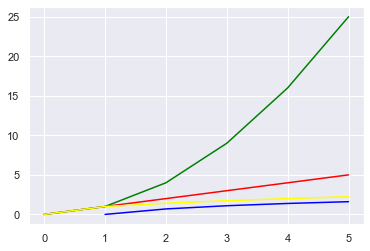

In [77]:
#2
x = np.arange(0,6)
plt.plot(x, x, color = 'red')
plt.plot(x, x**2, color = 'green')
plt.plot(x, np.log(x), color = 'blue')
plt.plot(x, np.sqrt(x), color = 'yellow')
plt.show()

<ipython-input-81-01c16384dcd6>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x), color = 'blue', linestyle='-.')


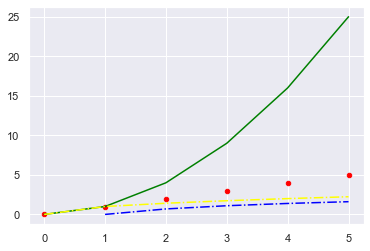

In [81]:
#3
x = np.arange(0,6)
plt.scatter(x, x, s=20, color = 'red')
plt.plot(x, x**2, color = 'green')
plt.plot(x, np.log(x), color = 'blue', linestyle='-.')
plt.plot(x, np.sqrt(x), color = 'yellow', linestyle='-.')
plt.show()

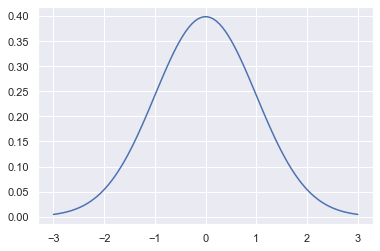

In [83]:
#5-a
x = np.linspace(-3,3,100)
y = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.plot(x, y)

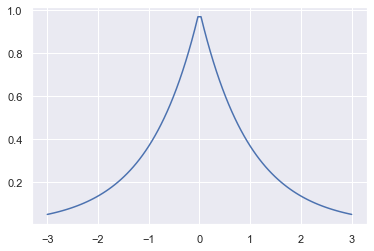

In [85]:
#5-b
x = np.linspace(-3,3,100)
y = np.exp(-np.abs(x))        #절대값 np.abs(x)
plt.plot(x,y)

<BarContainer object of 6 artists>

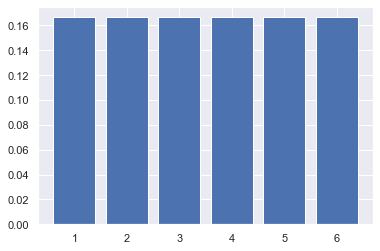

In [89]:
#7 
# P(x=j) = 1/6, j=1~6 인 X의 확률질량함수를 그래프로 나타내시오. 
x = [1,2,3,4,5,6]
y = 1/6
plt.bar(x,y)

In [90]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [91]:
#10-a
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [96]:
iris.groupby(iris['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


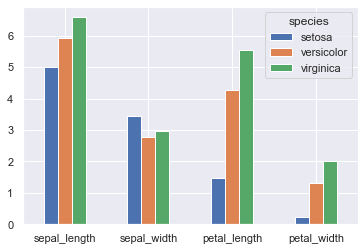

In [103]:
A = iris.groupby(iris['species']).mean()
A.T.plot.bar(rot=0) #rot=0 변수명의 기울기 값, A.T 즉, 전치를 사용해서 다르게 표현할 수도 있음
plt.show()

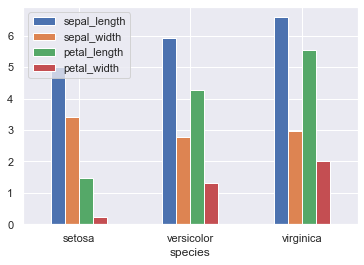

In [104]:
A.plot.bar(rot=0)
plt.show()

|Plot 메서드의 인수값들|
bar, pie, hist, kde, box, scatter, area

In [105]:
A

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [106]:
A.T

species,setosa,versicolor,virginica
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


In [109]:
#12
import pandas as pd

A = pd.DataFrame({
    'stretch' : [46,54,48,50,44,42,52],
    'distance' : [183,217,189,208,178,150,249]
})

B = pd.DataFrame({
    'stretch' : [25,45,35,40,55,60],
    'distance' : [71,196,127,187,249,291]
})

#일 때, a,b 두 집합을 합해서 x축을 stretch로 하여 산점도를 그리는데, 
#점 모양은 집합에 따라 'a','b'로 찍히도록 그래프를 그리시오.

In [110]:
A

,stretch,distance
0,46,183
1,54,217
2,48,189
3,50,208
4,44,178
5,42,150
6,52,249


In [148]:
C = pd.concat([A,B],axis=0)
C['group'] = ['a','a','a','a','a','a','a','b','b','b','b','b','b']
C = C.reset_index(drop=True)
C

,stretch,distance,group
0,46,183,a
1,54,217,a
2,48,189,a
3,50,208,a
4,44,178,a
5,42,150,a
6,52,249,a
7,25,71,b
8,45,196,b
9,35,127,b


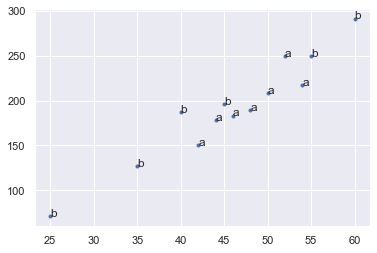

In [152]:
plt.scatter('stretch', 'distance', marker='.', data=C)
for i in range(len(C)):
    plt.annotate(C.group[i], xy=(C.stretch[i], C.distance[i]))
plt.show()

# 4장. 난수 발생과 모의 실험

### pmf  확률질량함수(probability mass function)
### pdf   확률밀도함수(probability density function)
### cdf   누적분포함수(cumulative distribution function)
### ppf   퍼센트포인트(percent point function)
### rvs   난수(random number)
### sf     생존함수(surviveal function) S(x) = 1- P(X<=x) = P(X>x)

* 함수
### loc=mean, scale=sdv

* norm.pdf(loc=0, scale=1, x=xvalue)   # f(x)
* norm.cdf(loc=0, scale=1, x=xvalue)   # P(X<=x)
* norm.sf(loc=0, scale=1, x=xvalue)   # P(X>x)
* norm.ppf(loc=0, scale=1, q=pvalue)
* norm.ppf(loc=0, scale=1, q=1-pvalue)
* norm.rvs(loc=0, scale=1, size=number)   #number 개수만큼 난수 발생

### 예제) Z~N(0,1)일때, P(Z<=-1)구하기

In [155]:
from scipy import stats
stats.norm.cdf(loc=0, scale=1, x=-1)
# 이 값을 나타내는 그래프를 그려보자

0.15865525393145707

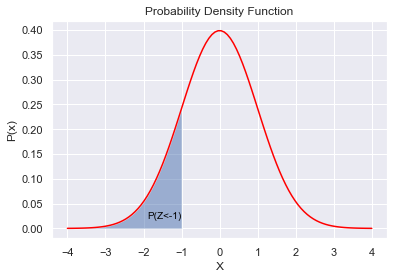

In [159]:
mu = 0
sigma = 1
x = np.linspace(mu-4*sigma, mu+4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

xx = np.linspace(mu-4*sigma, mu-sigma, 100)
yy = stats.norm.pdf(xx, mu, sigma)

plt.plot(x,y,'red')
plt.title('Probability Density Function')
plt.xlabel('X') ; plt.ylabel('P(x)')
plt.fill_between(xx,yy,alpha=0.5)
plt.text(-1.9, 0.02, 'P(Z<-1)', color='black', fontsize=10)
plt.show()

### 예제) Z~N(0,1)일때, P(Z>-1)구하기

In [162]:
stats.norm.sf(loc=0,scale=1,x=-1)
# 해당값을 그래프로 그려보자

0.8413447460685429

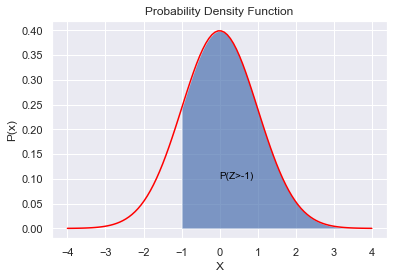

In [163]:
xx = np.linspace(mu-sigma, mu+4*sigma, 100)
yy = stats.norm.pdf(xx, mu, sigma)

plt.plot(x,y,'red')
plt.title('Probability Density Function')
plt.xlabel('X') ; plt.ylabel('P(x)')
plt.fill_between(xx,yy,alpha=0.7)
plt.text(0, 0.1, 'P(Z>-1)', color='black', fontsize=10)
plt.show()

### 평균 100, 표준편차 10인 정규분포로부터 난수 열 개 발생

In [164]:
stats.norm.rvs(loc=100, scale=10, size=10)

array([ 79.72273653,  90.34676239,  92.81967348, 100.30970533,
       102.49297762,  95.7851624 , 106.9590073 ,  91.76440606,
       110.55638197,  93.4925498 ])

### 평균 280, 표준편차 10인 정규분포를 따르르는 X, P(X<=270) 구하기

* 작은건 ==> cdf,     큰건 ==> sf

In [165]:
stats.norm.cdf(loc=280, scale=10, x=270)

0.15865525393145707

### 이 집단에서 아래로부터(왼쪽) 10%에 해당하는 값 구하기

In [167]:
stats.norm.ppf(loc=280, scale=10, q=0.1)

267.184484344554

### 이 집단에서 위로부터(오른쪽) 10%에 해당하는 값 구하기

In [168]:
stats.norm.ppf(loc=280, scale=10, q=0.9)

292.815515655446

### 평균 0, 표준편차 1

* 1) 왼쪽으로부터의 확률이 0.05가 되는 값 q1을 구하라
* 2) 왼쪽으로부터의 확률이 0.95가 되는 값 q2을 구하라
* 3) x = 0에서의 확률밀도함수값 f(0)을 구하라

In [169]:
stats.norm.ppf(loc=0, scale=1, q=0.05)

-1.6448536269514729

In [170]:
stats.norm.ppf(loc=0, scale=1, q=0.95)

1.6448536269514722

In [171]:
stats.norm.pdf(loc=0, scale=1, x=0)

0.3989422804014327

### 표준정규분포로부터 발생한 난수 100개로 히스토그램 그리기

In [173]:
RVS = stats.norm.rvs(loc=0, scale=1, size=100)

(array([ 2.,  2.,  8., 15., 18., 20., 21.,  9.,  4.,  1.]),
 array([-2.5885632 , -2.08343981, -1.57831642, -1.07319303, -0.56806964,
        -0.06294624,  0.44217715,  0.94730054,  1.45242393,  1.95754732,
         2.46267072]),
 <BarContainer object of 10 artists>)

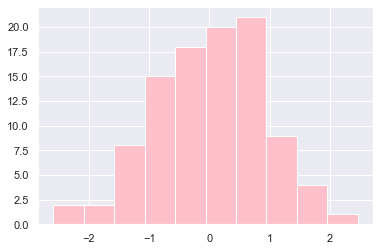

In [177]:
plt.hist(RVS, color='pink')

### t분포

#### t.pdf(df=dfvalue, x=xvalue)
#### t.cdf(df=dfvalue, x=xvalue)
#### t.sf(df=dfvalue, x=xvalue)
#### t.ppf(df=dfvalue, q=qvalue)
#### t.rvs(df=dfvalue, size=number)

### 자유도가 5인 t 분포의 pdf와 표준정규분포의 pdf 함께 그리기

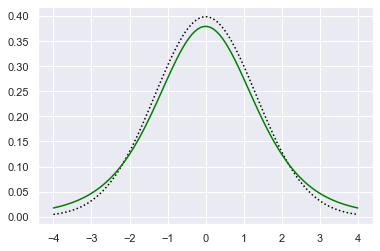

In [184]:
a = np.linspace(-3, 3, 100)
plt.plot(x, stats.norm.pdf(a), color='black', linestyle='dotted')
# 평균, 표준편차 안 써줘도 normal distribution을 만들어줌
plt.plot(x, stats.t.pdf(a, df=5), color='green')

#### 자유도가 5인 t분포를 따르는 난수 3개 발생

In [185]:
stats.t.rvs(df=5, size=3)

array([-0.35689139, -0.39615751,  1.53665372])

#### 자유도가 5인 t분포를 따르는 X, P(X<=2) 구하기

In [186]:
stats.t.cdf(df=5, x=2)

0.9490302605850708

#### 자유도가 5인 t분포를 따르는 X, P(X>2) 구하기

In [187]:
stats.t.sf(df=5, x=2)

0.05096973941492914

#### 자유도가 5인 t분포를 따르는 X, P(-1< X <1.5) 구하기

In [188]:
stats.t.cdf(df=5, x=1.5) - stats.t.cdf(df=5, x=-1)

0.7214394260542021

#### 자유도가 5인 t분포를 따르는 X, 아래로부터(왼쪽꼬리) 10% 해당값 구하기

In [189]:
stats.t.ppf(df=5, q=0.1)

-1.475884048782027

## 균일분포 (모수 [a, b] 구간을 설정해줘야 함)

#### uniform.pdf(loc=a, scale=b, x=xvalue)
#### uniform.cdf(loc=a, scale=b, x=xvalue)
#### uniform.sf(loc=a, scale=b, x=xvalue)
#### uniform.ppf(loc=a, scale=b, q=qvalue)
#### uniform.rvs(loc=a, scale=b, size=number)

#### [0,1]에서 균일분포로부터 난수 10개를 생성, 이 표본에 대한 평균 구하기

In [190]:
stats.uniform.rvs(loc=0, scale=1, size=10).mean()

0.33405121765294876

#### [0,1]에서 균일분포를 따르는 X, P(X<=0.5) 구하기

In [192]:
stats.uniform.cdf(loc=0, scale=1, x=0.5)

0.5

#### [1,5]에서 균일분포를 따르는 X, P(X>2) 구하기

In [193]:
stats.uniform.sf(loc=1, scale=5, x=2)

0.8

#### [0,1]에서 균일분포를 따르는 X, P(0.2<X<=0.6) 구하기

In [195]:
stats.uniform.cdf(loc=0, scale=1, x=0.6) - stats.uniform.cdf(loc=0, scale=1, x=0.2)

0.39999999999999997

#### [0,1]에서 균일분포의 확률밀도함수와 누적분포함수 그리기

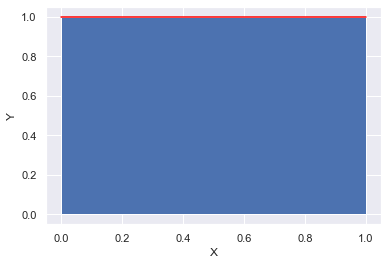

In [199]:
x = np.linspace(0,1,10)
y = stats.uniform.pdf(loc=0, scale=1, x=x)
plt.plot(x,y,'red')
plt.xlabel('X');plt.ylabel('Y')
plt.fill_between(x,y)

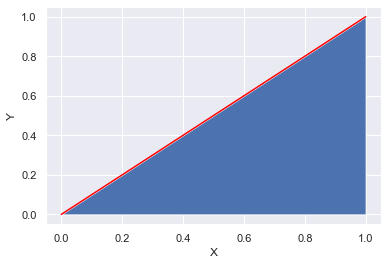

In [200]:
y = stats.uniform.cdf(loc=0, scale=1, x=x)
plt.plot(x,y,'red')
plt.xlabel('X');plt.ylabel('Y')
plt.fill_between(x,y)


## 지수분포, (발생비율 즉, 평균을 지정해줘야 함)

#### expon.pdf(scale=m, x=xvalue)
#### expon.cdf(scale=m, x=xvalue)
#### expon.sf(scale=m, x=xvalue)
#### expon.ppf(scale=m, q=qvalue)
#### expon.rvs(scale=m, size=number)

#### 평균 3인 지수분포로부터 난수 100개를 생성, 평균 구하기

In [201]:
stats.expon.rvs(scale=3, size=100).mean()

3.492250791314986

#### 평균 3인 지수분포를 따르는 X, P(X<=3) 구하기

In [202]:
stats.expon.cdf(scale=3, x=3)

0.6321205588285577

#### 평균 3인 지수분포를 따르는 X, P(X>2) 구하기

In [204]:
stats.expon.sf(scale=3, x=2)

0.513417119032592

In [205]:
# P(0.2<X<=1)
stats.expon.cdf(scale=3, x=1) - stats.expon.cdf(scale=3, x=0.2)

0.21897567445782845

#### 평균 1인 지수분포와 평균 3인 지수분포로 확률밀도함수 함께 그리기

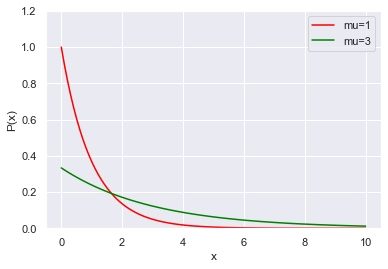

In [209]:
x = np.linspace(0,10,100)
y1 = stats.expon.pdf(scale=1, x=x)
y2 = stats.expon.pdf(scale=3, x=x)

plt.plot(x,y1,'red', label='mu=1')
plt.plot(x,y2,'green', label='mu=3')

plt.ylim(0, 1.2)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()

## $F$분포 (분자자유도, 분모자유도를 설정해줘야함)

#### f.pdf(dfn=d1, dfd=d2, x=xvalue)
#### f.cdf(dfn=d1, dfd=d2, x=xvalue)
#### f.sf(dfn=d1, dfd=d2, x=xvalue)
#### f.ppf(dfn=d1, dfd=d2, q=qvalue)
#### f.rvs(dfn=d1, dfd=d2, size=number)

#### 분자자유도 3, 분모자유도 10인 F분포로부터 난수 4개 생성, 평균구하기

In [210]:
stats.f.rvs(dfn=3, dfd=10, size=4).mean()

0.8733653423713504

In [211]:
# P(X<=3)
stats.f.cdf(dfn=3, dfd=10, x=3)

0.9182530481901752

In [212]:
# P(X>2)
stats.f.sf(dfn=3, dfd=10, x=2)

0.17800740737517542

In [213]:
# P(0.2<X<=1)
stats.f.cdf(dfn=3, dfd=10, x=1) - stats.f.cdf(dfn=3, dfd=10, x=0.2)

0.46168090839902376

In [214]:
# 왼쪽으로부터 95% 값 구하기
stats.f.ppf(dfn=3, dfd=10, q=0.95)

3.7082648190468435

In [215]:
# 왼쪽으로부터 5% 값 구하기
stats.f.ppf(dfn=3, dfd=10, q=0.05)

0.11382359425864687

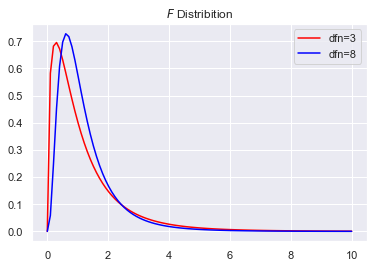

In [217]:
# 분자자유도 3, 8, 분모자유도 10인 F분포 확률밀도함수 그리기
x = np.linspace(0,10,100)
y1 = stats.f.pdf(dfn=3, dfd=10, x=x)
y2 = stats.f.pdf(dfn=8, dfd=10, x=x)

plt.plot(x,y1,'red', label='dfn=3')
plt.plot(x,y2,'blue', label='dfn=8')
plt.title('$F$ Distribition')
plt.legend()
plt.show()

## 카이제곱분포 (자유도 k를 설정해줘야함)

#### chi2.pdf(df=k, x=xvalue)
#### chi2.cdf(df=k, x=xvalue)
#### chi2.sf(df=k, x=xvalue)
#### chi2.ppf(df=k, q=qvalue)
#### chi2.rvs(df=k, size=number)

In [218]:
# 자유도 8인 카이제곱분포로부터 3개 난수
stats.chi2.rvs(df=8, size=3)

array([6.23973224, 1.32840747, 4.53619677])

In [219]:
# 자유도 8인 chi2, P(X<=3)
stats.chi2.cdf(df=8, x=3)

0.06564245437845008

In [220]:
## 자유도 8인 chi2, P(X>2)
stats.chi2.sf(df=8, x=2)

0.9810118431238462

In [221]:
# 자유도 8인 chi2, P(0.2<X<=1)
stats.chi2.cdf(df=8, x=1) - stats.chi2.cdf(df=8, x=0.2)

0.0017477757223654789

In [223]:
# 자유도 8인 chi2, 95% 해당값 구하기
stats.chi2.ppf(df=8, q=0.95)

15.50731305586545

In [224]:
# 자유도 8인 chi2, 5% 해당값 구하기
stats.chi2.ppf(df=8, q=0.05)

2.732636793499662

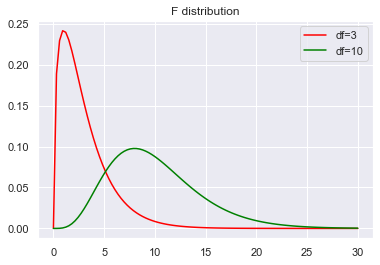

In [226]:
# 자유도 3인 chi2, 자유도 10인 chi2의 확률밀도함수 그리기
x= np.linspace(0, 30, 100)
y1 = stats.chi2.pdf(df=3, x=x)
y2 = stats.chi2.pdf(df=10, x=x)

plt.plot(x,y1,'red', label='df=3')
plt.plot(x,y2,'green', label='df=10')
plt.title('F distribution')
plt.legend()
plt.show()

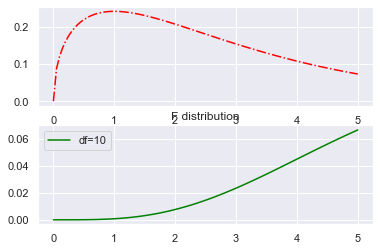

In [230]:
# 자유도 3인 chi2와 자유도 10인 chi2 x축 맞춰서 그리기
x= np.linspace(0, 5, 100)
y1 = stats.chi2.pdf(df=3, x=x)
y2 = stats.chi2.pdf(df=10, x=x)

plt.subplot(211)
plt.plot(x,y1,'red', linestyle='-.', label='df=3')
plt.subplot(212)
plt.plot(x,y2,'green', label='df=10')
plt.title('F distribution')
plt.legend()
plt.show()

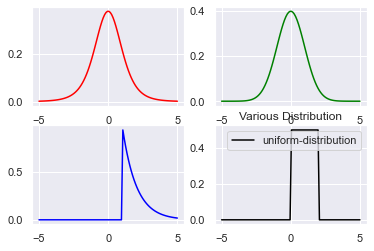

In [234]:
# 자유도 5인
# 1) t분포, 
# 2) 표준정규분포, 
# 3) 평균1인 지수분포,
# 4) [0,2]에서의 균일분포에 대한
# 확률밀도함수 그리기

x = np.linspace(-5,5,100)
y1 = stats.t.pdf(df=5, x=x)
y2 = stats.norm.pdf(x=x)
y3 = stats.expon.pdf(x=x, loc=1)
y4 = stats.uniform.pdf(x=x, loc=0, scale=2)

plt.subplot(221)
plt.plot(x,y1,'red',label='t-distribution')
plt.subplot(222)
plt.plot(x,y2,'green',label='normal-distribution')
plt.subplot(223)
plt.plot(x,y3,'blue',label='exponential-distribution')
plt.subplot(224)
plt.plot(x,y4,'black',label='uniform-distribution')
plt.legend()
plt.title('Various Distribution')
plt.show()

## 이산분포 (모수B(n,p)를 지정해줘야 함)

#### binom.pmf(n=n, p=prob, k=xvalue)   : 확률밀도함수가 아닌, 확률질량함수임
#### binom.cdf(n=n, p=prob, k=xvalue)
#### binom.sf(n=n, p=prob, k=xvalue)
#### binom.ppf(n=n, p=prob, q=qvalue)
#### binom.rvs(n=n, p=prob, size=number)

In [236]:
# 10회 독립시행이며 성공확률이 0.3인 이항분포
# 0,1,2,3,4,5 값에 대한 확률값을 구하시오
stats.binom.pmf(n=10, p=0.3, k=[0,1,2,3,4,5])

array([0.02824752, 0.12106082, 0.23347444, 0.26682793, 0.20012095,
       0.10291935])

In [237]:
# x값이 (1,3,6)일 경우, 각 값까지 누적확률 구하기
stats.binom.pmf(n=10, p=0.3, k=[1,3,6])

array([0.12106082, 0.26682793, 0.03675691])

In [238]:
# 0.2, 0.5, 0.8의 누적확률을 갖는 확률변수값 구하기
stats.binom.ppf(n=10, p=0.3, q=[0.2, 0.5, 0.8])

array([2., 3., 4.])

In [239]:
# 이항분포 B(10, 0.3)을 따르는 난수 5개 얻기
stats.binom.rvs(n=10, p=0.3, size=5)

array([3, 1, 2, 4, 4])

## 이산분포 (모수 평균 mu를 지정해줘야 함)

#### poisson.pmf(mu=muvalue, x=xvalue)   : 확률밀도함수가 아닌, 확률질량함수임
#### poisson.cdf(mu=muvalue, x=xvalue)
#### poisson.ppf(mu=muvalue, q=qvalue)
#### poisson.rvs(mu=muvalue, size=number)